# Seaborn


## Indice


* [Introducción a Seaborn](#Introducción-a-Seaborn)
* [Distribution Plots](#Distribution-Plots)
* [Categorical Plots](#Categorical-Plots)
* [Matrix Plots](#Matrix-Plots)
* [Grids](#Grids)

## Introducción a Seaborn

* Seaborn es una librería open source para gráficos estadísticos.
* Está diseñada para trabajar en conjunto con Pandas.

**Para instalar Seaborn, escribir en la terminal:**

`conda install seaborn`

`pip install seaborn`


**Para utilizar Seaborn, es necesario importar la libreria:**

`import seaborn as sns`


Podemos encontrar una extensa documentación en su [Página Web](http://seaborn.pydata.org)

## Distribution Plots

Algunos de los graficos mas utilizados para visualizar la distribucion de un dataset son:

* distplot
* jointplot
* pairplot
* rugplot

In [38]:
import seaborn as sns
# para ver los gráficos dentro del notebook:
%matplotlib inline
import matplotlib.pyplot as plt

**Importamos el dataset "Tips" que viene con seaborn. Tiene datos de las propinas dejadas en un restaurante.**

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### displot
Permite ver la distribucion de una variable como un histograma.

La linea que se ve se llama kde (kernel densitiy estimation).

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


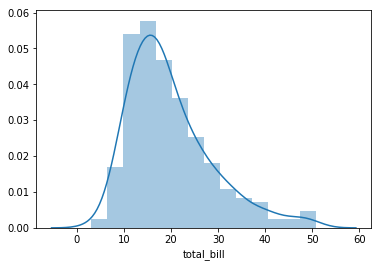

In [5]:
sns.distplot(tips['total_bill'])

`kde=False` Para ver el grafico sin [kde](https://en.wikipedia.org/wiki/Kernel_density_estimation)

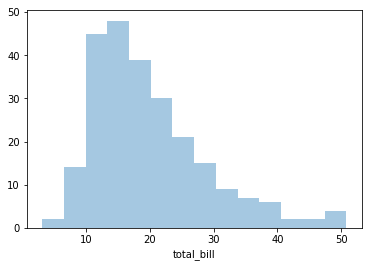

In [6]:
sns.distplot(tips['total_bill'], kde=False)

`bins` para cambiar la cantidad de barras

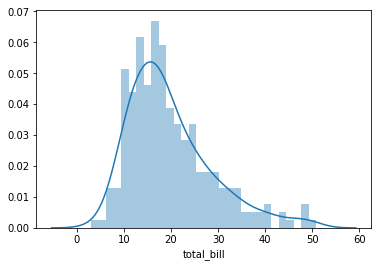

In [7]:
sns.distplot(tips['total_bill'], bins= 30)

### jointplot

Permite comparar la distribucion de 2 variables:

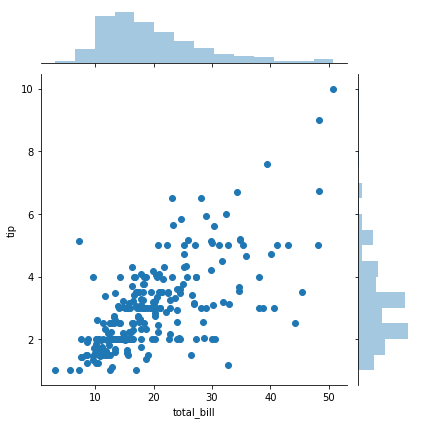

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips)

Podemos cambiar la visualizacion, por ejemplo: hex (hexagonos), reg (regresion lineal), kde

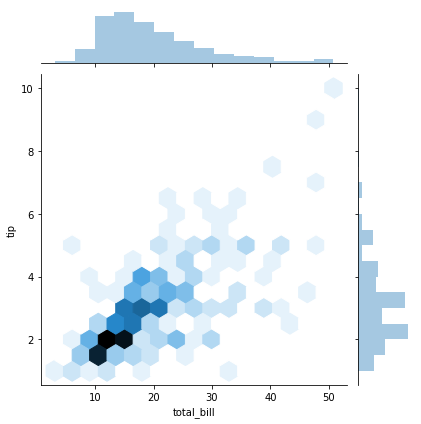

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

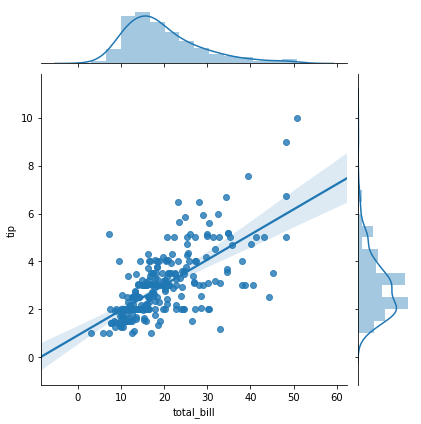

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

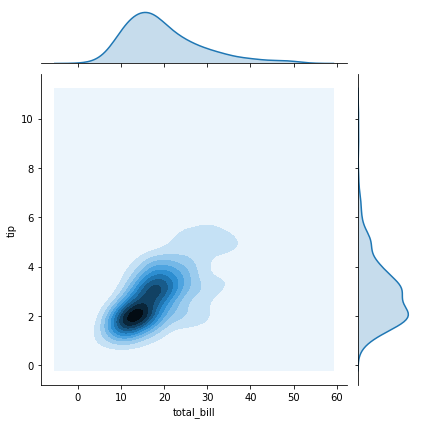

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

### pairplot

Es un jointplot de todas las combinaciones de variables numericas del dataset

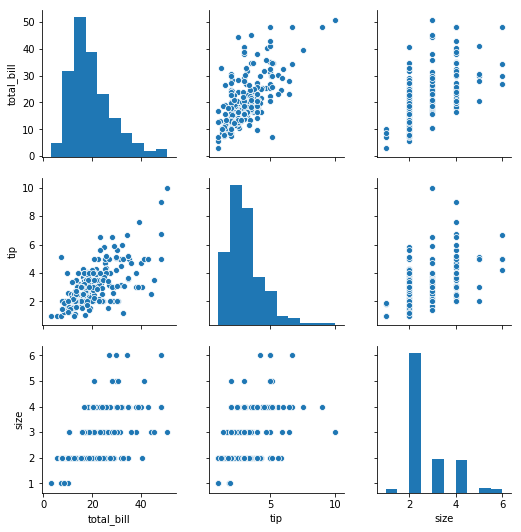

In [12]:
sns.pairplot(tips)

`hue` permite incorporar una variable categorica: 

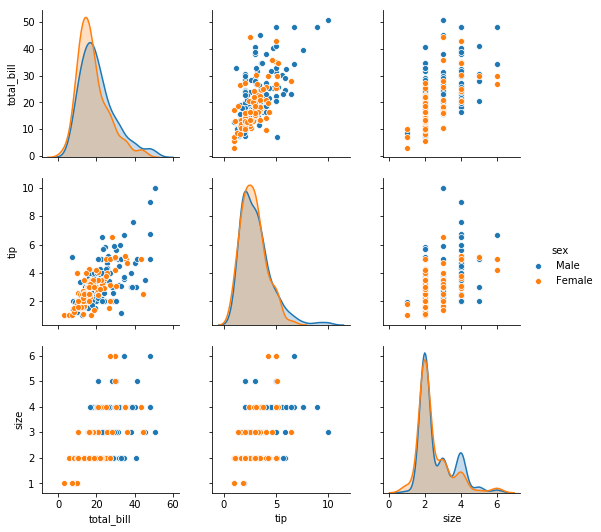

In [13]:
sns.pairplot(tips, hue='sex')

`palette` permite cambiar la paleta de colores

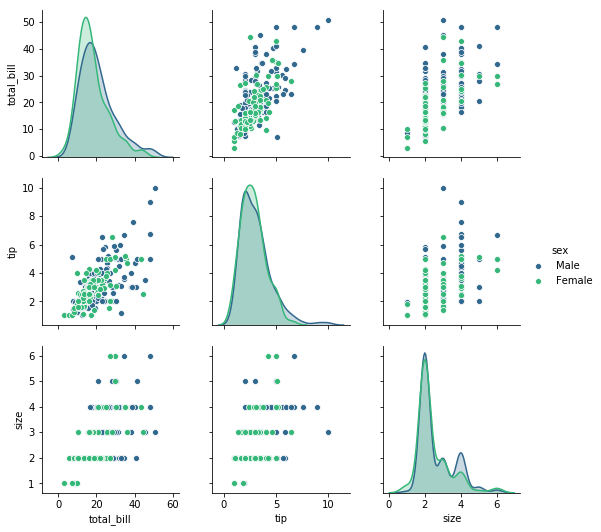

In [14]:
sns.pairplot(tips, hue='sex', palette='viridis')

### rugplot

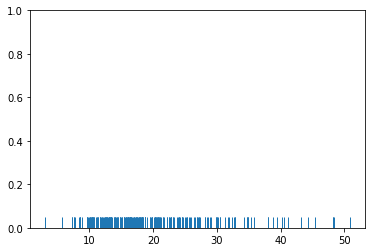

In [15]:
sns.rugplot(tips['total_bill'])

## Categorical Plots

* barplot
* countplot
* boxplot
* stripplot
* swarmplot


### barplot

Permite graficar variables categoricas segun distintos estimadores (por default el promedio)

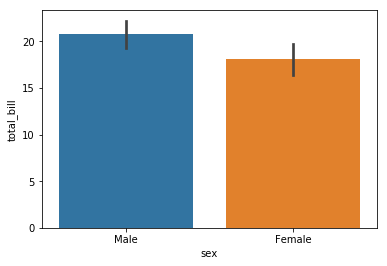

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips)

Podemos cambiar el estimador, por ejemplo a la desviación estándar:

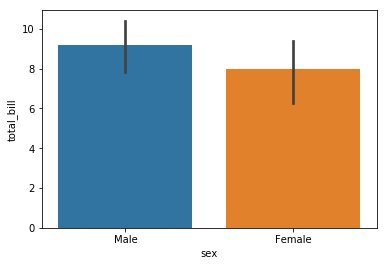

In [17]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

### countplot
Es como un barplot pero el eje y cuenta unicamente la cantidad de eventos

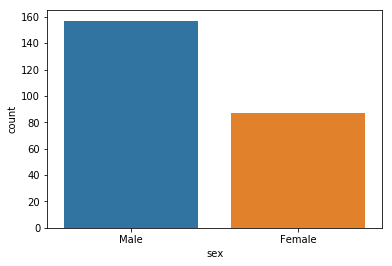

In [18]:
sns.countplot(x='sex',data=tips)

### boxplot
Se ven los cuartiles y outliers

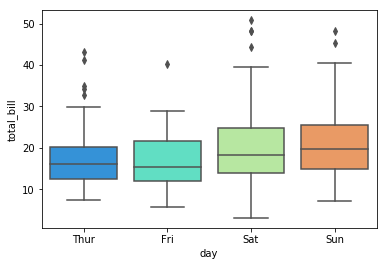

In [19]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

Podemos agregar un `hue`

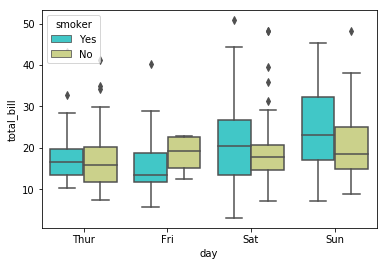

In [20]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow', hue='smoker')

### stripplot

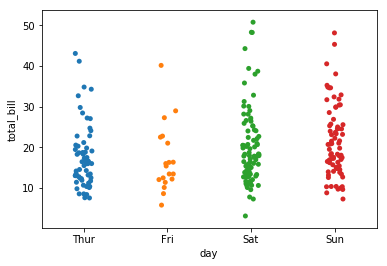

In [21]:
sns.stripplot(x="day", y="total_bill", data=tips)

Podemos agregar un `hue`

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


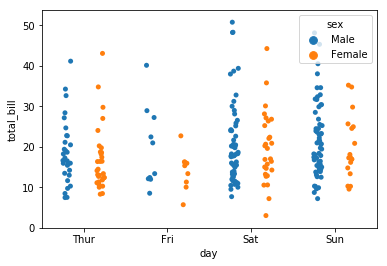

In [22]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', split=True)

### swarmplot

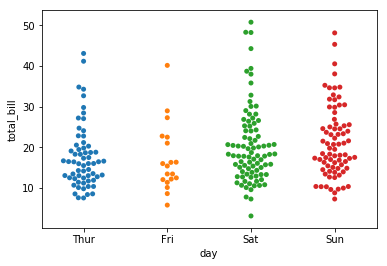

In [23]:
sns.swarmplot(x="day", y="total_bill", data=tips)

## Matrix Plots

* heatmap
* clustermap

### heatmap

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Para ver la correlacion entre las distintas variables numericas del dataset

In [25]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Podemos graficar esta correlacion en un `heatmap`

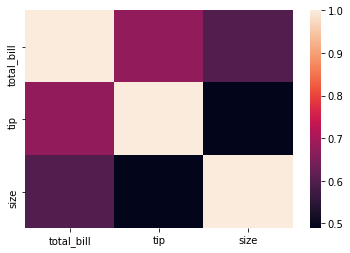

In [26]:
sns.heatmap(tips.corr())

Para ver los valores de cada celda y cambiar los colores

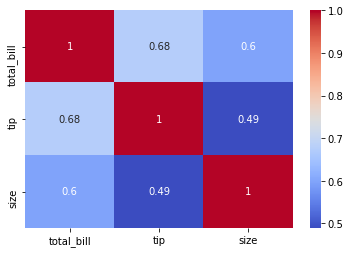

In [27]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Usemos un nuevo dataset:

In [28]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Podemos reorganizar el dataset como un `pivot table`

In [29]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


Para ver como fue variando la cantidad de pasajeros a traves de los años podemos usar heatmap. Tambien vemos en que meses hay mas viajes.

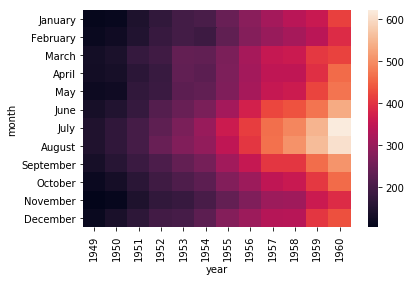

In [30]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

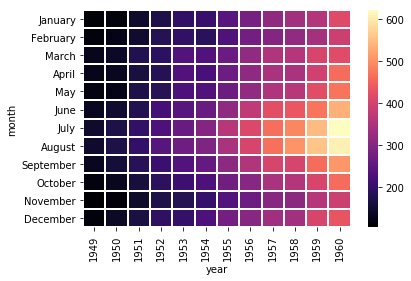

In [31]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

### clustermap

Arma clusters jerárquicos del heatmap de acuerdo a su similitud

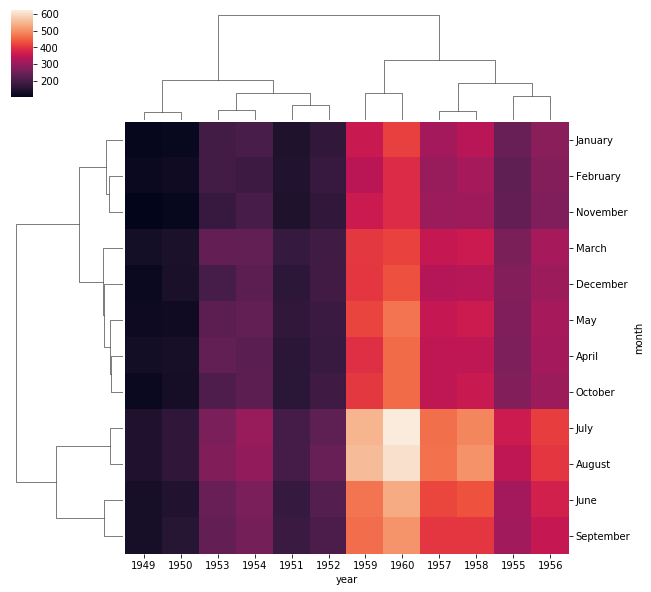

In [32]:
sns.clustermap(pvflights)

Mas opciones de visualizacion, por ejemplo normalizando los valores:

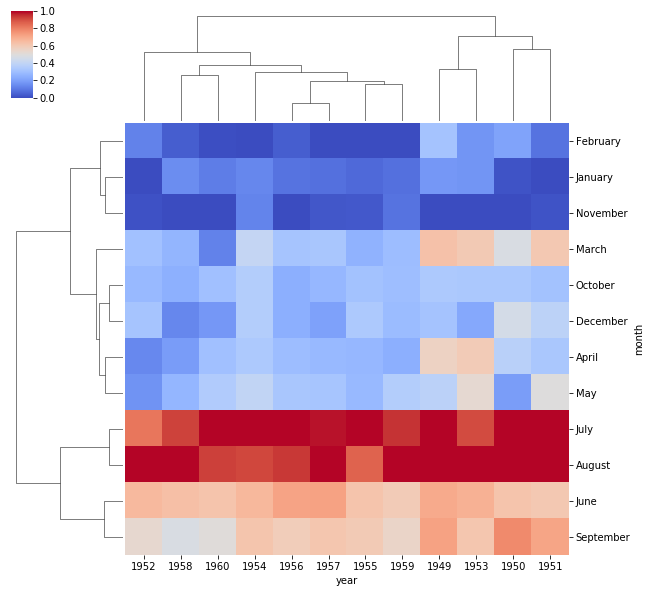

In [33]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

## Grids

Usemos un nuevo dataset con medidas de distintas flores

In [34]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Veamos que especies de flores hay en el dataset

In [35]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## PairGrid

Pairplot nos da una grilla de subplots con las relaciones entre las distintas columnas del dataset.

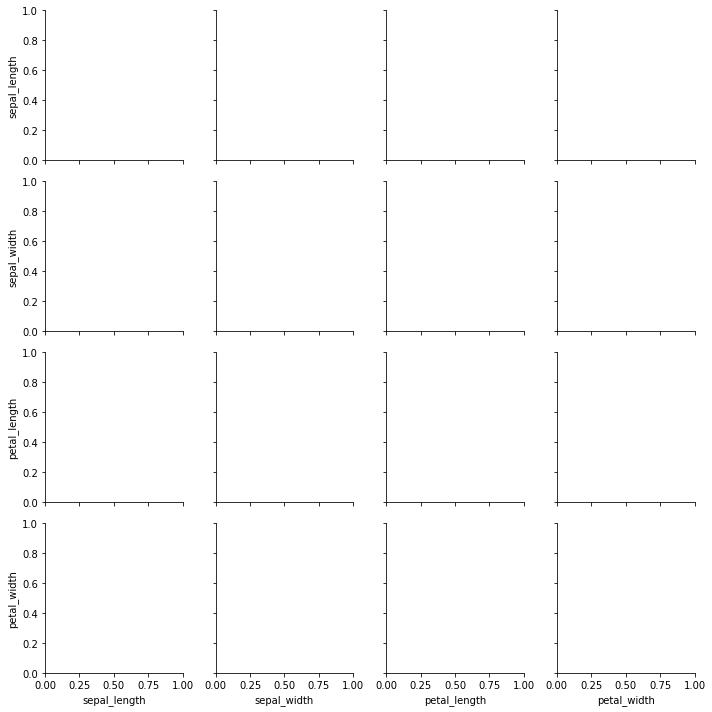

In [36]:
# PairGrid vacio
g = sns.PairGrid(iris)

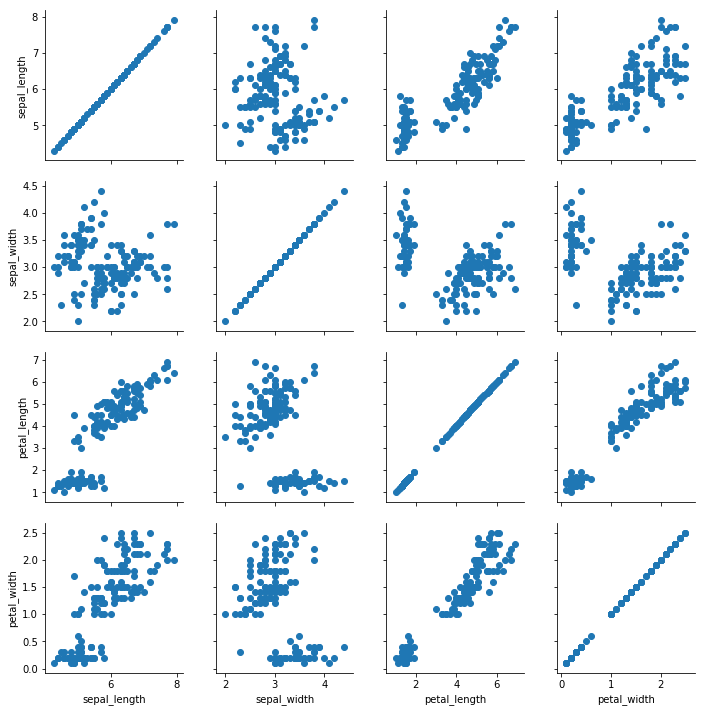

In [39]:
# Se mapea sobre el PairGrid
g = sns.PairGrid(iris)
g.map(plt.scatter)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


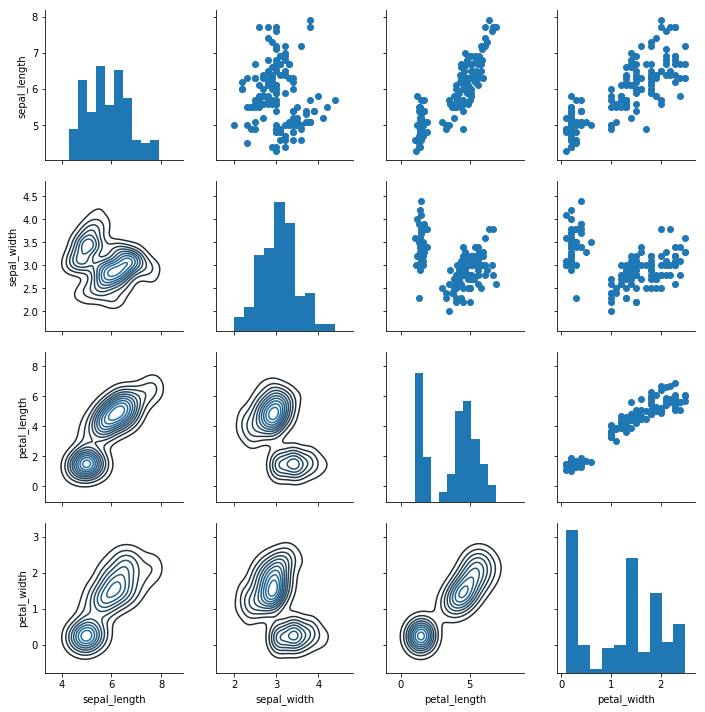

In [40]:
# Mapeo upper, lower y diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Pairplot

Pairplot es una version mas simple de PairGrid

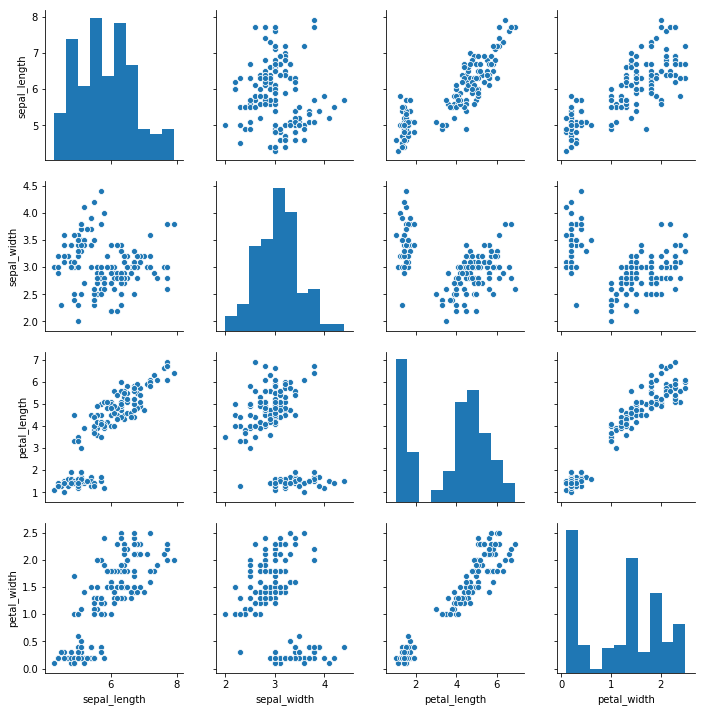

In [41]:
sns.pairplot(iris)

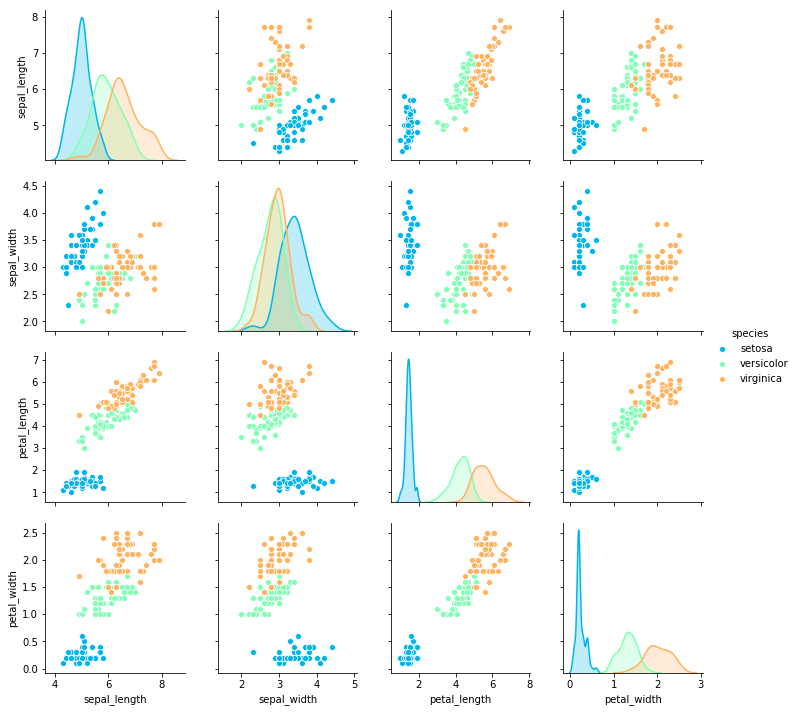

In [42]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid es una forma general para crear graficos de grillas:

In [43]:
tips = sns.load_dataset('tips')

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


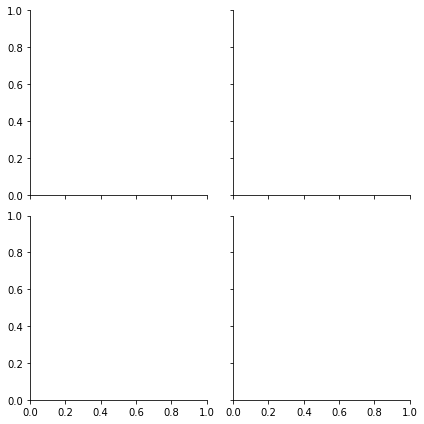

In [45]:
# Grid vacio
g = sns.FacetGrid(tips, col="time", row="smoker")

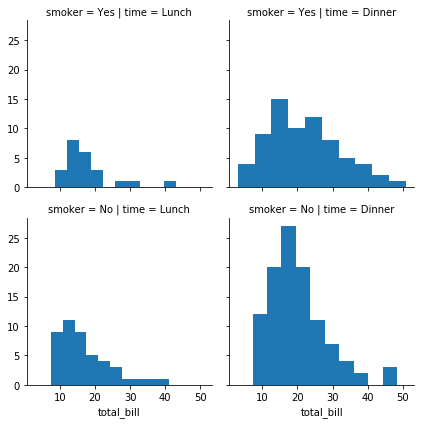

In [46]:
# Con .map graficamos los valores sobre el grid vacio
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

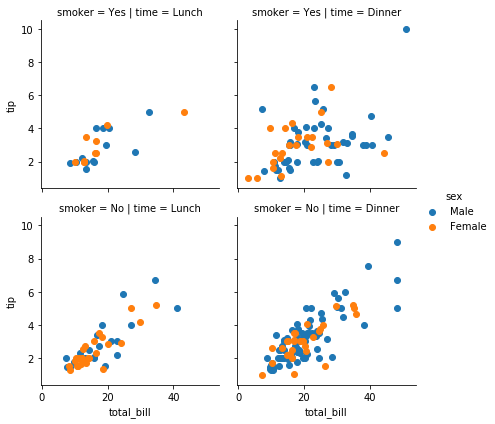

In [47]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notar que los argumentos se agregan luego de plt.scatter
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid el la version general de jointplot() 

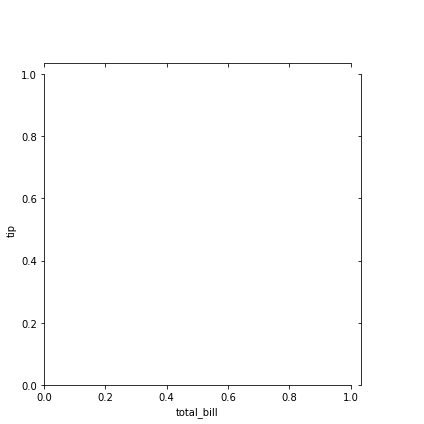

In [48]:
# grid vacio
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

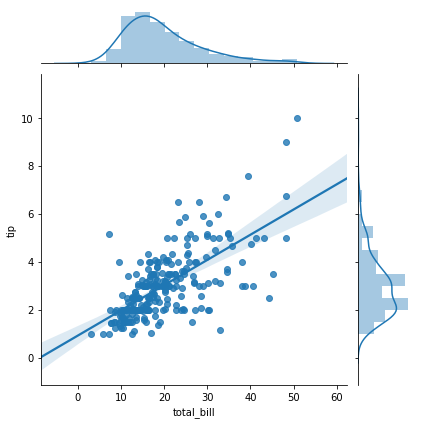

In [49]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Referencias

 * [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

 * [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/share/10008ABEAfdFxVRn4=/)

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

© 2018. Infiniem Lab DSP. infiniemlab.dsp@gmail.com. Introducción informal a Python3 (CC BY-SA 4.0)